# S7E1 Linearization

## Nonlinear device within simple voltage source  $ E = 5 $ and resistor $ R = 2 $ circuit
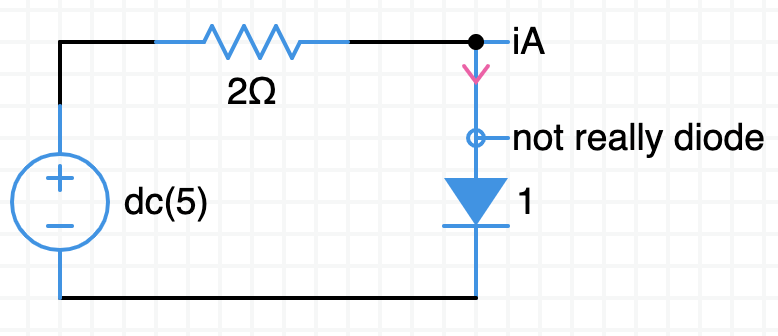

From definition of the nonlinear device:

## $ i_{A} = 10 * (1 - e^{\frac{-v_{D}}{5}}) $

From the KVL of voltage source and resistor with nonlinear device:

## $ \frac{(v_{D} - E)}{R} + i_{A} = 0 $

## Find $ v_{A} $ for the KVL equation



In [12]:
from scipy import optimize
from math import e

def func_ia(vA):
    return 10 * (1 - e**(-vA/5))

def func_kvl(vD, E, R, ia):
    return (vD - E) / R + ia(vD)

def solve_vA(f, f_ia, E, R, guess):
    return optimize.newton(f, guess, args=(E, R, f_ia))

E = 5.0
R = 2.0
vA = solve_vA(func_kvl, func_ia, E, R, 1.0)
print("vA is: ", vA)

vA is:  1.0882236100027467


## Find $ \frac{\Delta v_{A}}{\Delta v_{I}} $ when 2% percent increase in E

In [13]:
E = 5.0
R = 2.0
vA = solve_vA(func_kvl, func_ia, E, R, 1.0)

deltaE = .02 * E
deltaVA = solve_vA(func_kvl, func_ia, E + deltaE, R, 1.0) - vA


print( deltaVA / deltaE )



0.2375289027922256


# Linearize function and find incremental resistance

## Incremental resistance is $ \Delta \frac{v_{a}}{i_{a}}  = \frac{1}{\frac{di_{A}}{dv_{A}}}$

## derivative of $ 10 * (1 - e^{\frac{-v_{D}}{5}}) $   is   $  - \frac{-10}{5} * e^{ \frac{-v_{A}}{5}} $

## which is $ 2 * e^{ \frac{-v_{A}}{5}} $

In [14]:
def func_dfvD(vA):
    return 2 * e**(-vA/5)

vA = 1.0882236100027467

print( 1.0 / func_dfvD(vA))

0.6215726634842746
